In [266]:
pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
Note: you may need to restart the kernel to use updated packages.


In [784]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import pickle

In [785]:
ai_data=pd.read_csv('Downloads/XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')

In [786]:
ai_data_df=pd.DataFrame(ai_data)

In [787]:
# ai_data_df=ai_data_df[~ai_data_df['Major'].isin(['Fine Arts', 'Philosophy', 'Civil Engineering'])]

In [788]:
# ai_data_df=ai_data_df[ai_data_df['Year'].isin(['Year 2','Year 3'])]

In [789]:
# ai_data_df=ai_data_df[~ai_data_df['Time'].isin(['8','17'])]

In [790]:
ai_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5000 non-null   object
 1   Major       5000 non-null   object
 2   University  5000 non-null   object
 3   Time        5000 non-null   int64 
 4   Order       5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [791]:
ai_data.columns

Index(['Year', 'Major', 'University', 'Time', 'Order'], dtype='object')

In [792]:
time_to_meal_type={}
for i in list(ai_data_df['Time'].unique()):
    if i in (8,9,10,11):
        time_to_meal_type[i]='Breakfast'
    elif i in (12,13,14,15):
        time_to_meal_type[i]='Lunch'
    else:
        time_to_meal_type[i]='Evening_Snack'

In [793]:
time_to_meal_type

{12: 'Lunch',
 14: 'Lunch',
 11: 'Breakfast',
 15: 'Lunch',
 13: 'Lunch',
 17: 'Evening_Snack',
 9: 'Breakfast',
 10: 'Breakfast',
 16: 'Evening_Snack',
 8: 'Breakfast'}

In [794]:
Meal_type=[]
for i in list(ai_data_df['Time']):
    Meal_type.append(time_to_meal_type[i])
ai_data_df['Meal_type']=Meal_type

In [795]:
for i in list(ai_data.columns):
    print ("Frequency for {0} : ".format(i))
    print (ai_data[i].value_counts())
    print ("\n")

Frequency for Year : 
Year 3    2719
Year 2    2273
Year 1       5
Year 4       3
Name: Year, dtype: int64


Frequency for Major : 
Chemistry                  640
Biology                    635
Astronomy                  619
Physics                    610
Mathematics                582
Economics                  511
Business Administration    334
Political Science          309
Marketing                  239
Anthropology               146
Finance                    135
Psychology                  76
Accounting                  62
Sociology                   31
International Business      29
Music                       21
Mechanical Engineering      11
Philosophy                   4
Fine Arts                    3
Civil Engineering            3
Name: Major, dtype: int64


Frequency for University : 
Butler University                                            1614
Indiana State University                                     1309
Ball State University                                       

## We observe that there is no imbalance in the classes 

In [796]:
ai_data_df['Order'][ai_data_df['Year']=='Year 2'].value_counts()

Indiana Pork Chili                                          428
Fried Catfish Basket                                        396
Sweet Potato Fries                                          392
Ultimate Grilled Cheese Sandwich (with bacon and tomato)    370
Breaded Pork Tenderloin Sandwich                            364
Indiana Buffalo Chicken Tacos (3 tacos)                     105
Hoosier BBQ Pulled Pork Sandwich                             71
Sugar Cream Pie                                              55
Cornbread Hush Puppies                                       54
Indiana Corn on the Cob (brushed with garlic butter)         38
Name: Order, dtype: int64

In [797]:
ai_data_df['Order'][ai_data_df['Year']=='Year 3'].value_counts()

Sugar Cream Pie                                             457
Indiana Corn on the Cob (brushed with garlic butter)        457
Cornbread Hush Puppies                                      456
Hoosier BBQ Pulled Pork Sandwich                            411
Indiana Buffalo Chicken Tacos (3 tacos)                     388
Ultimate Grilled Cheese Sandwich (with bacon and tomato)    131
Breaded Pork Tenderloin Sandwich                            129
Sweet Potato Fries                                          114
Fried Catfish Basket                                         94
Indiana Pork Chili                                           82
Name: Order, dtype: int64

<Axes: xlabel='Order', ylabel='Major'>

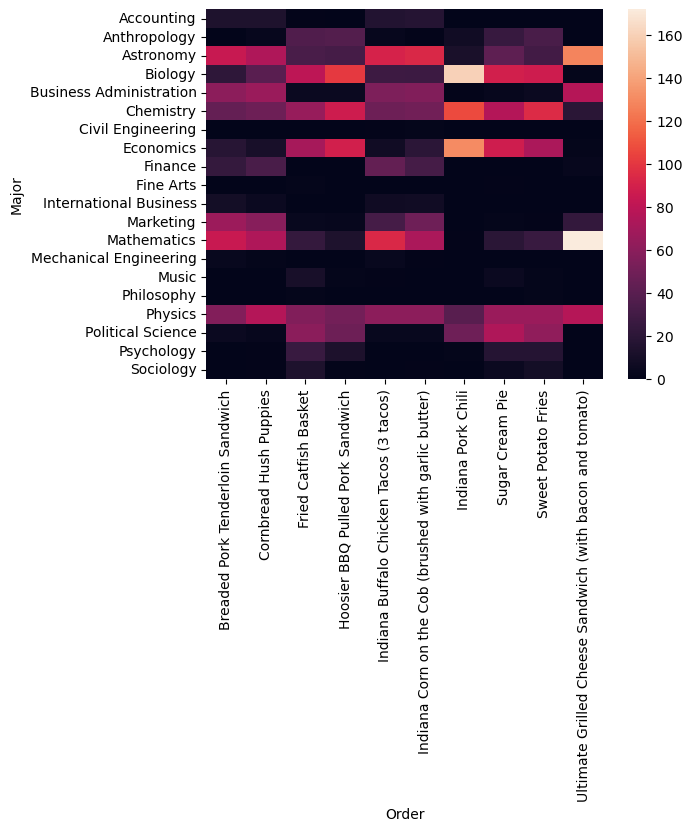

In [798]:
sns.heatmap(pd.crosstab(ai_data_df.Major, ai_data_df.Order))

In [799]:
from scipy.stats import chi2_contingency

In [800]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [801]:
ai_data_df.columns

Index(['Year', 'Major', 'University', 'Time', 'Order', 'Meal_type'], dtype='object')

In [802]:
feature_vs_correlation={}
for i in ['Year', 'Major', 'University', 'Time', 'Meal_type']:
    feature_vs_correlation[i]=cramers_v(ai_data_df[i],ai_data_df['Order'])


In [803]:
feature_vs_correlation

{'Year': 0.3813953575194632,
 'Major': 0.25143208517789967,
 'University': 0.25172121175512524,
 'Time': 0.25086443856455637,
 'Meal_type': 0.343501995393279}

In [804]:
for i in list(ai_data_df['Major'].unique()):
    print ("For the Major {0} :".format(i))
    print (ai_data_df['Order'][ai_data_df['Major']==i].value_counts())
    print ('\n')

For the Major Physics :
Ultimate Grilled Cheese Sandwich (with bacon and tomato)    77
Cornbread Hush Puppies                                      76
Sugar Cream Pie                                             66
Sweet Potato Fries                                          66
Indiana Corn on the Cob (brushed with garlic butter)        61
Indiana Buffalo Chicken Tacos (3 tacos)                     61
Breaded Pork Tenderloin Sandwich                            57
Fried Catfish Basket                                        56
Hoosier BBQ Pulled Pork Sandwich                            51
Indiana Pork Chili                                          39
Name: Order, dtype: int64


For the Major Chemistry :
Indiana Pork Chili                                          107
Sweet Potato Fries                                           95
Hoosier BBQ Pulled Pork Sandwich                             87
Sugar Cream Pie                                              76
Fried Catfish Basket                

In [805]:
ai_data_df['Order'][ai_data_df['Major']=='Accounting'].value_counts()

Indiana Corn on the Cob (brushed with garlic butter)    17
Indiana Buffalo Chicken Tacos (3 tacos)                 16
Cornbread Hush Puppies                                  14
Breaded Pork Tenderloin Sandwich                        14
Fried Catfish Basket                                     1
Name: Order, dtype: int64

In [806]:
ai_data_df['Order'][ai_data_df['Major']=='Accounting'].value_counts()

Indiana Corn on the Cob (brushed with garlic butter)    17
Indiana Buffalo Chicken Tacos (3 tacos)                 16
Cornbread Hush Puppies                                  14
Breaded Pork Tenderloin Sandwich                        14
Fried Catfish Basket                                     1
Name: Order, dtype: int64

In [807]:
ai_data_df.columns

Index(['Year', 'Major', 'University', 'Time', 'Order', 'Meal_type'], dtype='object')

In [808]:
from sklearn.preprocessing import OneHotEncoder

In [809]:
one_hot_encoded_data = pd.get_dummies(ai_data_df, columns = ['Year', 'University','Major','Time', 'Meal_type']) 
# one_hot_encoded_data=one_hot_encoded_data.drop(columns = [])
one_hot_encoded_data


,Order,Year_Year 1,Year_Year 2,Year_Year 3,Year_Year 4,University_Ball State University,University_Butler University,University_DePauw University,University_Indiana State University,University_Indiana University Bloomington,...,Time_11,Time_12,Time_13,Time_14,Time_15,Time_16,Time_17,Meal_type_Breakfast,Meal_type_Evening_Snack,Meal_type_Lunch
0,Fried Catfish Basket,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,Sugar Cream Pie,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,Indiana Pork Chili,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,Fried Catfish Basket,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,Indiana Corn on the Cob (brushed with garlic b...,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Breaded Pork Tenderloin Sandwich,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4996,Ultimate Grilled Cheese Sandwich (with bacon a...,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4997,Sugar Cream Pie,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4998,Sugar Cream Pie,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [810]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [811]:
X = one_hot_encoded_data.drop('Order', axis=1)
Y = one_hot_encoded_data['Order']
col_names= X.columns

In [812]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, stratify=Y)

In [813]:
X_train

,Year_Year 1,Year_Year 2,Year_Year 3,Year_Year 4,University_Ball State University,University_Butler University,University_DePauw University,University_Indiana State University,University_Indiana University Bloomington,University_Indiana University-Purdue University Indianapolis (IUPUI),...,Time_11,Time_12,Time_13,Time_14,Time_15,Time_16,Time_17,Meal_type_Breakfast,Meal_type_Evening_Snack,Meal_type_Lunch
985,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3118,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3602,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4733,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1980,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
117,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2458,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3982,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [814]:
Y_train

985     Hoosier BBQ Pulled Pork Sandwich
3118    Breaded Pork Tenderloin Sandwich
3602                Fried Catfish Basket
4733                  Sweet Potato Fries
1980                  Sweet Potato Fries
                      ...               
2750                Fried Catfish Basket
117                      Sugar Cream Pie
2458              Cornbread Hush Puppies
3982                  Indiana Pork Chili
1922    Breaded Pork Tenderloin Sandwich
Name: Order, Length: 4250, dtype: object

In [815]:
# scaler=StandardScaler()
# pd.DataFrame(scaler.fit_transform(X_train))


In [816]:
from sklearn.feature_selection import SelectKBest

In [817]:
from sklearn.feature_selection import f_classif

In [818]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


In [819]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [820]:
from sklearn.ensemble import AdaBoostClassifier

In [821]:
from sklearn.neighbors import KNeighborsClassifier

In [822]:
from sklearn.metrics import accuracy_score

In [823]:
from sklearn.metrics import classification_report

In [824]:
model_dt= DecisionTreeClassifier(class_weight='balanced', max_depth =5)
model_dt.fit(X_train, Y_train)
y_pred=model_dt.predict(X_test)

In [825]:
Y_test

1987                     Breaded Pork Tenderloin Sandwich
4625                                 Fried Catfish Basket
530                                    Indiana Pork Chili
4584              Indiana Buffalo Chicken Tacos (3 tacos)
2670                               Cornbread Hush Puppies
                              ...                        
1998    Indiana Corn on the Cob (brushed with garlic b...
2891                                   Sweet Potato Fries
1843                                      Sugar Cream Pie
3293                                   Sweet Potato Fries
1346                               Cornbread Hush Puppies
Name: Order, Length: 750, dtype: object

In [826]:
accuracy_score(Y_test, y_pred)

0.492

In [827]:
y_pred

array(['Ultimate Grilled Cheese Sandwich (with bacon and tomato)',
       'Sweet Potato Fries', 'Indiana Pork Chili',
       'Hoosier BBQ Pulled Pork Sandwich', 'Cornbread Hush Puppies',
       'Sweet Potato Fries', 'Indiana Pork Chili',
       'Cornbread Hush Puppies',
       'Ultimate Grilled Cheese Sandwich (with bacon and tomato)',
       'Sweet Potato Fries', 'Cornbread Hush Puppies',
       'Breaded Pork Tenderloin Sandwich', 'Indiana Pork Chili',
       'Sweet Potato Fries', 'Sweet Potato Fries', 'Sweet Potato Fries',
       'Sweet Potato Fries', 'Cornbread Hush Puppies',
       'Cornbread Hush Puppies', 'Indiana Pork Chili',
       'Cornbread Hush Puppies',
       'Indiana Corn on the Cob (brushed with garlic butter)',
       'Sugar Cream Pie',
       'Indiana Corn on the Cob (brushed with garlic butter)',
       'Sugar Cream Pie', 'Sweet Potato Fries',
       'Hoosier BBQ Pulled Pork Sandwich',
       'Ultimate Grilled Cheese Sandwich (with bacon and tomato)',
       'Indiana 

In [828]:
print(classification_report(Y_test, y_pred))


                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.47      0.11      0.18        74
                                  Cornbread Hush Puppies       0.53      0.52      0.53        77
                                    Fried Catfish Basket       0.46      0.15      0.22        74
                        Hoosier BBQ Pulled Pork Sandwich       0.42      0.68      0.52        72
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.00      0.00      0.00        74
    Indiana Corn on the Cob (brushed with garlic butter)       0.53      0.85      0.65        74
                                      Indiana Pork Chili       0.45      0.81      0.58        77
                                         Sugar Cream Pie       0.46      0.56      0.51        77
                                      Sweet Potato Fries       0.46      0.70      0.55        76
Ultimate Grilled Ch

/Users/dhanyan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dhanyan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dhanyan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [829]:
model_rf= RandomForestClassifier( n_estimators= 2000,min_samples_split= 5,min_samples_leaf= 1,
                                 max_features= 'sqrt',max_depth= 100, bootstrap= True)
model_rf.fit(X_train, Y_train)
y_pred=model_rf.predict(X_test)

In [830]:
accuracy_score(Y_test, y_pred)

0.668

In [831]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   2.3s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   2.3s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   1.5s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   3.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimat

/Users/dhanyan/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   2.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   2.1s
[CV] END bootstrap=False, max_depth=80, 

In [ ]:
y_pred=rf_random.predict(X_test)

In [ ]:
rf_random.best_params_

In [ ]:
accuracy_score(Y_test, y_pred)

In [695]:
print(classification_report(Y_test, y_pred))


                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.57      0.46      0.51        74
                                  Cornbread Hush Puppies       0.55      0.55      0.55        77
                                    Fried Catfish Basket       0.63      0.55      0.59        74
                        Hoosier BBQ Pulled Pork Sandwich       0.65      0.64      0.64        72
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.49      0.50      0.49        74
    Indiana Corn on the Cob (brushed with garlic butter)       0.71      0.80      0.75        74
                                      Indiana Pork Chili       0.74      0.75      0.75        77
                                         Sugar Cream Pie       0.65      0.71      0.68        77
                                      Sweet Potato Fries       0.53      0.53      0.53        76
Ultimate Grilled Ch

In [696]:
# model_knn= KNeighborsClassifier(n_neighbors=3)

# # y_pred=model_knn.predict(X_test)

In [697]:
# model_knn.fit(X_train, Y_train)

In [698]:
# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors=5)
# classifier.fit(X_train, Y_train)

In [699]:
# y_pred=classifier.predict(X_test)

In [762]:
from sklearn import svm

#Create a svm Classifier
svm_clf = svm.SVC(kernel='poly', degree = 4) # Linear Kernel

#Train the model using the training sets
svm_clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = svm_clf.predict(X_test)

In [763]:
accuracy_score(Y_test, y_pred)

0.6373333333333333

In [702]:
print(classification_report(Y_test, y_pred))


                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.63      0.51      0.57        74
                                  Cornbread Hush Puppies       0.58      0.62      0.60        77
                                    Fried Catfish Basket       0.67      0.55      0.61        74
                        Hoosier BBQ Pulled Pork Sandwich       0.59      0.61      0.60        72
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.62      0.54      0.58        74
    Indiana Corn on the Cob (brushed with garlic butter)       0.69      0.80      0.74        74
                                      Indiana Pork Chili       0.73      0.81      0.77        77
                                         Sugar Cream Pie       0.62      0.64      0.63        77
                                      Sweet Potato Fries       0.53      0.53      0.53        76
Ultimate Grilled Ch

In [703]:
model_ada= AdaBoostClassifier(n_estimators=35)
model_ada.fit(X_train, Y_train)
y_pred=model_ada.predict(X_test)

In [704]:
accuracy_score(Y_test, y_pred)

0.39466666666666667

In [705]:
print(classification_report(Y_test, y_pred))


                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.67      0.11      0.19        74
                                  Cornbread Hush Puppies       0.40      0.45      0.43        77
                                    Fried Catfish Basket       0.12      0.05      0.08        74
                        Hoosier BBQ Pulled Pork Sandwich       0.48      0.54      0.51        72
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.34      0.22      0.26        74
    Indiana Corn on the Cob (brushed with garlic butter)       0.39      0.62      0.48        74
                                      Indiana Pork Chili       0.49      0.49      0.49        77
                                         Sugar Cream Pie       0.43      0.48      0.45        77
                                      Sweet Potato Fries       0.24      0.36      0.28        76
Ultimate Grilled Ch

In [706]:
ai_data_df['Order'][ai_data_df['Year']=='Year 2'].value_counts().sum()

2273

In [779]:
pickle.dump(model_rf,open('Downloads/Random_forest_model_Xtern', 'wb'))
rf_model_loaded=pickle.load(open('Downloads/Random_forest_model_Xtern', 'rb'))

In [783]:
pickle.dump(model_rf,open('Desktop/GitUploads/Xtern-AI-project/Random_forest_model_Xtern', 'wb'))
rf_model_loaded=pickle.load(open('Downloads/Random_forest_model_Xtern', 'rb'))

In [780]:
rf_model_loaded=pickle.load(open('Downloads/Random_forest_model_Xtern', 'rb'))

In [712]:
pickle.dump(svm_clf,open('Downloads/SVM_model_Xtern', 'wb'))
svm_model_loaded=pickle.load(open('Downloads/SVM_model_Xtern', 'rb'))

In [782]:
rf_model_loaded.predict(X_test)

array(['Sugar Cream Pie', 'Sugar Cream Pie',
       'Indiana Corn on the Cob (brushed with garlic butter)',
       'Indiana Buffalo Chicken Tacos (3 tacos)', 'Sugar Cream Pie',
       'Indiana Corn on the Cob (brushed with garlic butter)',
       'Fried Catfish Basket', 'Hoosier BBQ Pulled Pork Sandwich',
       'Breaded Pork Tenderloin Sandwich', 'Indiana Pork Chili',
       'Breaded Pork Tenderloin Sandwich', 'Sugar Cream Pie',
       'Indiana Corn on the Cob (brushed with garlic butter)',
       'Ultimate Grilled Cheese Sandwich (with bacon and tomato)',
       'Indiana Buffalo Chicken Tacos (3 tacos)',
       'Breaded Pork Tenderloin Sandwich', 'Indiana Pork Chili',
       'Hoosier BBQ Pulled Pork Sandwich',
       'Hoosier BBQ Pulled Pork Sandwich',
       'Indiana Buffalo Chicken Tacos (3 tacos)',
       'Breaded Pork Tenderloin Sandwich', 'Indiana Pork Chili',
       'Ultimate Grilled Cheese Sandwich (with bacon and tomato)',
       'Sweet Potato Fries',
       'Indiana Corn on 

In [713]:
X_test.columns

Index(['Year_Year 1', 'Year_Year 2', 'Year_Year 3', 'Year_Year 4',
       'University_Ball State University', 'University_Butler University',
       'University_DePauw University', 'University_Indiana State University',
       'University_Indiana University Bloomington',
       'University_Indiana University-Purdue University Indianapolis (IUPUI)',
       'University_Purdue University', 'University_University of Evansville',
       'University_University of Notre Dame',
       'University_Valparaiso University', 'Major_Accounting',
       'Major_Anthropology', 'Major_Astronomy', 'Major_Biology',
       'Major_Business Administration', 'Major_Chemistry',
       'Major_Civil Engineering', 'Major_Economics', 'Major_Finance',
       'Major_Fine Arts', 'Major_International Business', 'Major_Marketing',
       'Major_Mathematics', 'Major_Mechanical Engineering', 'Major_Music',
       'Major_Philosophy', 'Major_Physics', 'Major_Political Science',
       'Major_Psychology', 'Major_Sociology',